In [ ]:
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 73.7 MB/s eta 0:00:00


This work is published in the IEEE Access journal (Q1) and has been peer-reviewed by domain experts in this field.
Authors: Khorshed Alam, Mahbubul Haq Bhuiyan, Md. Shafiqul Islam, Abul Hossain Choudhury, Zaheed Bhuiyan, Dr. Suman Ahmmed.

Idea: Our AI-driven PDF Chatbot is specialized for Project Management (PM) Automation and acts as a virtual Project Manager that offers continuous support to global teams. It interprets PDF data like SRS reports and interview transcripts by utilizing Open-Assistant's SFT-1 12B Model. Insights from interviews of 15 project managers have enriched the knowledge base of our chatbot and ultimately enabled informative responses to the stakeholders of the project. Advanced AI techniques ensure efficient text preprocessing, including tokenization, numerical normalization, lowercasing, removing punctuation, removing extra spaces, recursive character text splitter, and lemmatization. It is primarily tailored for e-commerce project and provides precise guidance based on e-commerce data and risk management factors. With an average cosine similarity of 80.80\% and semantic similarity score of 85.21\%, it consistently aligns with PDF Contents and optimize the project management phases \& methodologies. This innovation enhances Human-Robot Interaction, PM Automation, facilitates decision-making, and enables uninterrupted communication.

##Our Contribution:

1) Custom Dataset.
2) Advanced Preprocessing.
3) First to implement AI-driven PDF Chatbot which is specialized for **Project Management (PM) Automation and acts as a virtual Project Manager**.

In [ ]:
!pip install reportlab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.1 MB/s eta 0:00:00


Data Preprocessing 

In [ ]:
import re
import pdfplumber
from reportlab.pdfgen import canvas
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')  # Download the punkt tokenizer if you haven't already
nltk.download('wordnet')
def extract_text_from_pdf(pdf_path):
    with pdfplumber.open(pdf_path) as pdf:
        text = ''
        for page in pdf.pages:
            text += page.extract_text() + ' '
    return text

def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()

    # Tokenization
    sentences = nltk.sent_tokenize(text)
    tokens = [nltk.word_tokenize(sent) for sent in sentences]

    # Numerical normalization, Lowercasing, Removing punctuation, Removing extra spaces, Lemmatization
    preprocessed_tokens = []
    for sent_tokens in tokens:
        processed_tokens = [lemmatizer.lemmatize(token.lower()) if not token.isdigit() else '<number>' for token in sent_tokens if token.isalnum()]
        preprocessed_tokens.append(processed_tokens)

    return preprocessed_tokens

def save_text_to_pdf(preprocessed_tokens, output_pdf_path):
    c = canvas.Canvas(output_pdf_path)
    y = 800
    for sentence_tokens in preprocessed_tokens:
        x = 72
        for token in sentence_tokens:
            c.drawString(x, y, token)  # Adjust position as needed
            x += 10  # Move to the next token (adjust this as per your requirements)
        y -= 20  # Move to the next line
    c.save()

# Example usage
input_pdf_path = '/content/An Effective E-Commerce System for Bangladesh to Adopt – An Empirical Study (2).pdf'  # Change to your PDF file path
output_pdf_path = '/content/preprocessed_Dataset.pdf'  # Output file path

text = extract_text_from_pdf(input_pdf_path)
preprocessed_tokens = preprocess_text(text)
save_text_to_pdf(preprocessed_tokens, output_pdf_path)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
import re
import pdfplumber
from reportlab.pdfgen import canvas
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')  # Download the punkt tokenizer if you haven't already
nltk.download('wordnet')

def extract_text_from_pdf(pdf_path):
    with pdfplumber.open(pdf_path) as pdf:
        text = ''
        for page in pdf.pages:
            text += page.extract_text() + ' '
    return text

def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()

    # Tokenization
    sentences = nltk.sent_tokenize(text)
    tokens = [nltk.word_tokenize(sent) for sent in sentences]

    # Lowercasing, Removing punctuation, Removing extra spaces, Lemmatization
    preprocessed_tokens = []
    for sent_tokens in tokens:
        processed_tokens = [lemmatizer.lemmatize(token.lower()) for token in sent_tokens if token.isalnum()]
        preprocessed_tokens.append(processed_tokens)

    return preprocessed_tokens

def save_text_to_pdf(preprocessed_tokens, output_pdf_path):
    c = canvas.Canvas(output_pdf_path)
    y = 800
    for sentence_tokens in preprocessed_tokens:
        x = 72
        for token in sentence_tokens:
            c.drawString(x, y, token)  # Adjust position as needed
            x += 10  # Move to the next token (adjust this as per your requirements)
        y -= 20  # Move to the next line
    c.save()

# Example usage
input_pdf_path = '/content/Main Dataset.pdf'  # Change to your PDF file path
output_pdf_path = '/content/preprocessed.pdf'  # Output file path

text = extract_text_from_pdf(input_pdf_path)
preprocessed_tokens = preprocess_text(text)
save_text_to_pdf(preprocessed_tokens, output_pdf_path)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Web Interface and Model Training

In [ ]:
import gradio as gr
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.llms import HuggingFaceHub
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import Chroma
from langchain.chains import RetrievalQA
from langchain.document_loaders import PyMuPDFLoader
import re
import nltk
import os
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
import time

# Create variables to track performance metrics
total_queries = 0
correct_answers = 0
total_response_time = 0
nltk.download('punkt')
nltk.download('stopwords')
os.environ["HUGGINGFACEHUB_API_TOKEN"] = "Add API key from Hugging face website. Thank you"

def load_doc(pdf_doc):

    loader = PyMuPDFLoader(pdf_doc.name)
    documents = loader.load()
    embedding = HuggingFaceEmbeddings()
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=200)
    text = text_splitter.split_documents(documents)
    db = Chroma.from_documents(text, embedding)

    llm = HuggingFaceHub(repo_id="OpenAssistant/oasst-sft-1-pythia-12b", model_kwargs={"temperature": 0.8, "max_length": 512})
    global chain
    chain = RetrievalQA.from_chain_type(llm=llm,chain_type="stuff",retriever=db.as_retriever())
    return 'Document has successfully been loaded'


def answer_query(query):
    global total_queries, correct_answers, total_response_time

    # Measure response time
    start_time = time.time()

    # Get bot response
    response = chain.run(query)

    # Update response time
    end_time = time.time()
    total_response_time = end_time - start_time

    print('Response Time:', total_response_time)




    return response
html = """
<div style="text-align:center; max width: 700px;">
    <h1>You Virtual Project Manager Here</h1>
    <p> Upload a PDF/doc File of your project's SRS report, then click on Load PDF File <br>
    Once the document has been loaded you can begin chatting with the PDF
</div>"""
css = """container{max-width:700px; margin-left:auto; margin-right:auto,padding:20px}"""
with gr.Blocks(css=css,theme=gr.themes.Monochrome()) as demo:
    gr.HTML(html)
    with gr.Column():
        gr.Markdown('Developed by Dept. of CSE, UIU')
        pdf_doc = gr.File(label="Load a pdf", file_types=['.pdf', '.docx'], type='filepath')

        with gr.Row():
            load_pdf = gr.Button('Load pdf file')
            status = gr.Textbox(label="Status",placeholder='',interactive=False)


        with gr.Row():
            input = gr.Textbox(label="type in your question")
            output = gr.Textbox(label="output")
        submit_query = gr.Button("submit")

        load_pdf.click(load_doc,inputs=pdf_doc,outputs=status)

        submit_query.click(answer_query,input,output)

demo.launch()

Cosine Similarity and Semantic Similarity Score Analysis

In [ ]:
with open(file_path, newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    # Access the field names (headers)
    headers = reader.fieldnames
    print(headers)

['\ufeffprompt', 'expected', 'response']


In [ ]:
import csv
import numpy as np
import tensorflow_hub as hub

# Load Universal Sentence Encoder
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

file_path = '/content/Analysis.csv'
responses = []
expected = []

# Read data from CSV
with open(file_path, newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        responses.append(row['response'])
        expected.append(row['expected'])

# Calculate cosine similarity
vectorizer = CountVectorizer().fit_transform(responses + expected)
response_vectors = vectorizer[:len(responses)]
expected_vectors = vectorizer[len(responses):]
cosine_similarities = cosine_similarity(response_vectors, expected_vectors)

# Calculate semantic similarity using Universal Sentence Encoder
response_embeddings = embed(responses)
expected_embeddings = embed(expected)
semantic_similarities = np.inner(response_embeddings, expected_embeddings)

# Calculate average similarity scores
average_cosine_similarity = np.mean(cosine_similarities.diagonal())
average_semantic_similarity = np.mean(semantic_similarities.diagonal())

print(f"Average Cosine Similarity: {average_cosine_similarity}")
print(f"Average Semantic Similarity: {average_semantic_similarity}")


Average Cosine Similarity: 0.8080950993394342
Average Semantic Similarity: 0.8521837592124939


In [ ]:
print(cosine_similarities.diagonal())

[0.34914862 0.30308003 0.54723417 0.32271372 0.55910614 0.68895102
 0.32260254 0.47140452 0.27958071 1.         1.         1.
 1.         0.9375     0.9078413  1.         1.         1.
 1.         1.         1.         0.9375     1.         1.
 1.         1.         1.         1.        ]


In [ ]:
print(semantic_similarities.diagonal())

[0.549142   0.40274847 0.73123926 0.6147414  0.6739478  0.6408143
 0.38950965 0.50731254 0.58047885 0.99999976 0.99999964 0.99999964
 1.0000001  0.94611144 0.9138259  0.9999999  0.99999976 1.
 0.9651646  0.99999964 1.0000001  0.9461114  0.99999976 0.99999964
 1.0000002  1.0000002  0.9999999  1.0000002 ]


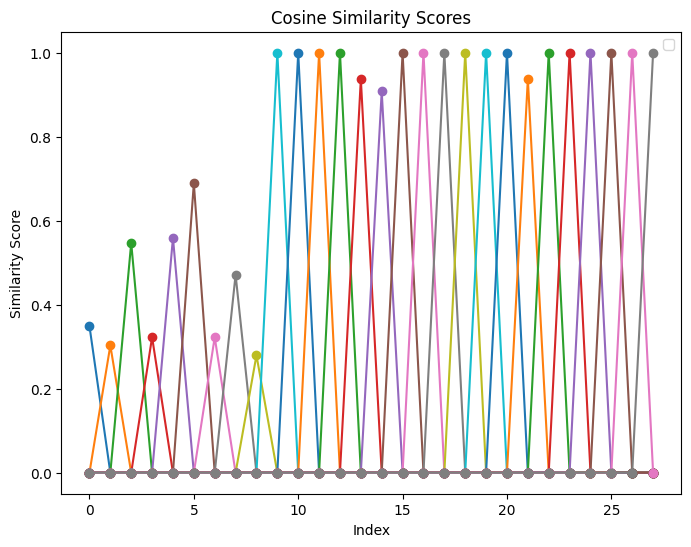

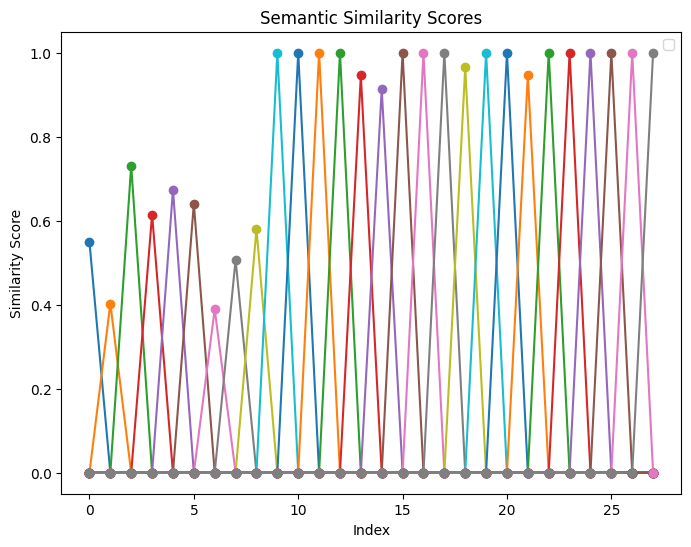

In [ ]:
import matplotlib.pyplot as plt

# Assuming cosine_similarities and semantic_similarities are computed arrays

# Plotting cosine similarities
plt.figure(figsize=(8, 6))
plt.plot(np.diag(cosine_similarities.diagonal()), marker='o')
plt.xlabel('Index')
plt.ylabel('Similarity Score')
plt.title('Cosine Similarity Scores')
plt.legend()
plt.show()

# Plotting semantic similarities
plt.figure(figsize=(8, 6))
plt.plot(np.diag(semantic_similarities.diagonal()), marker='o')
plt.xlabel('Index')
plt.ylabel('Similarity Score')
plt.title('Semantic Similarity Scores')
plt.legend()
plt.show()